<a href="https://colab.research.google.com/github/maimuna/CAP5610-Introduction-to-Machine-Learning--Final-Project/blob/master/CAP5610_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Preparation

Step 1 - Import the libraries

In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn
import io
import requests
from google.colab import files
import seaborn as sns





/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
uploaded = files.upload()
uploaded

Saving Admission.xlsx to Admission.xlsx


{'Admission.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00\xebz\xd2\x93b\x01\x00\x00\x90\x04\x00\x00\x13\x00\xdc\x01[Content_Types].xml \xa2\xd8\x01(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

Step 2 - Read the dataset

In [10]:
dataset = pd.read_excel(io.BytesIO(uploaded['Admission.xlsx']))
dataset

,admit,gre,gpa,ses,Gender_Male,Race,rank
0,0,380,3.61,1,0,3,3
1,1,660,3.67,2,0,2,3
2,1,800,4.00,2,0,2,1
3,1,640,3.19,1,1,2,4
4,0,520,2.93,3,1,2,4
...,...,...,...,...,...,...,...
395,0,620,4.00,2,0,2,2
396,0,560,3.04,2,0,1,3
397,0,460,2.63,3,0,2,2
398,0,700,3.65,1,1,1,2


Step 3 - Trying to understand the features

In [ ]:
print(type(dataset))
print(dataset.keys())
print (dataset)

<class 'pandas.core.frame.DataFrame'>
Index(['admit', 'gre', 'gpa', 'ses', 'Gender_Male', 'Race', 'rank'], dtype='object')
     admit  gre   gpa  ses  Gender_Male  Race  rank
0        0  380  3.61    1            0     3     3
1        1  660  3.67    2            0     2     3
2        1  800  4.00    2            0     2     1
3        1  640  3.19    1            1     2     4
4        0  520  2.93    3            1     2     4
..     ...  ...   ...  ...          ...   ...   ...
395      0  620  4.00    2            0     2     2
396      0  560  3.04    2            0     1     3
397      0  460  2.63    3            0     2     2
398      0  700  3.65    1            1     1     2
399      0  600  3.89    2            1     3     3

[400 rows x 7 columns]


In [ ]:
print(dataset.head())

   admit  gre   gpa  ses  Gender_Male  Race  rank
0      0  380  3.61    1            0     3     3
1      1  660  3.67    2            0     2     3
2      1  800  4.00    2            0     2     1
3      1  640  3.19    1            1     2     4
4      0  520  2.93    3            1     2     4


In [ ]:
dataset.tail(3)

,admit,gre,gpa,ses,Gender_Male,Race,rank
397,0,460,2.63,3,0,2,2
398,0,700,3.65,1,1,1,2
399,0,600,3.89,2,1,3,3


In [ ]:
#no of rows, cols
print(dataset.shape)

(400, 7)


In [ ]:
#info about the data
dataset.describe()

,admit,gre,gpa,ses,Gender_Male,Race,rank
count,400.000000,400.000000,400.000000,400.000000,400.000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,1.992500,0.475,1.962500,2.48500
std,0.466087,115.516536,0.380567,0.808751,0.500,0.823279,0.94446
min,0.000000,220.000000,2.260000,1.000000,0.000,1.000000,1.00000
25%,0.000000,520.000000,3.130000,1.000000,0.000,1.000000,2.00000
50%,0.000000,580.000000,3.395000,2.000000,0.000,2.000000,2.00000
75%,1.000000,660.000000,3.670000,3.000000,1.000,3.000000,3.00000
max,1.000000,800.000000,4.000000,3.000000,1.000,3.000000,4.00000


In [ ]:
#figure out non NA values
print(dataset.count())

admit          400
gre            400
gpa            400
ses            400
Gender_Male    400
Race           400
rank           400
dtype: int64


In [86]:
print(dataset.duplicated().sum())

0


In [ ]:
#info about cols
print(dataset.columns)

Index(['admit', 'gre', 'gpa', 'ses', 'Gender_Male', 'Race', 'rank'], dtype='object')


In [ ]:
#check does have any missing values
dataset.isnull().any()

admit          False
gre            False
gpa            False
ses            False
Gender_Male    False
Race           False
rank           False
dtype: bool

In [ ]:
#lets summarize the dataset

#get sum
print(dataset.sum())

admit             127.00
gre            235080.00
gpa              1355.96
ses               797.00
Gender_Male       190.00
Race              785.00
rank              994.00
dtype: float64


In [ ]:
#get mean
print(dataset.mean())

admit            0.3175
gre            587.7000
gpa              3.3899
ses              1.9925
Gender_Male      0.4750
Race             1.9625
rank             2.4850
dtype: float64


In [ ]:
#get median
print(dataset.median())

admit            0.000
gre            580.000
gpa              3.395
ses              2.000
Gender_Male      0.000
Race             2.000
rank             2.000
dtype: float64


In [ ]:
#finding correlation
corr_matrix = dataset.corr()
corr_matrix['admit'].sort_values(ascending=False)

admit          1.000000
gre            0.184434
gpa            0.178212
Gender_Male   -0.025004
ses           -0.046858
Race          -0.060335
rank          -0.242513
Name: admit, dtype: float64

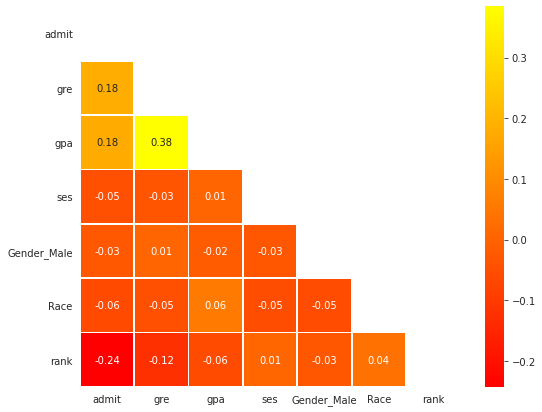

In [ ]:
dataset.head().T
corr = dataset.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr,mask=mask,square=True,annot=True,fmt='0.2f',linewidths=.8,cmap="autumn")

It seems the features like gre, gpa and Gender_Male, are the features we are going to use in our model.

In [ ]:
#Checking True / False Ratio
# Pythonic Way
num_true = len(dataset.loc[dataset['admit'] == 1])
num_false = len(dataset.loc[dataset['admit'] == 0])
print ("Number of person admitted: {0} ({1:2.2f}%)".format(num_true, (num_true / (num_true + num_false)) * 100))
print ("Number of person not admitted: {0} ({1:2.2f}%)".format(num_false, (num_false / (num_true + num_false)) * 100))

Number of person admitted: 127 (31.75%)
Number of person not admitted: 273 (68.25%)


## Visualization

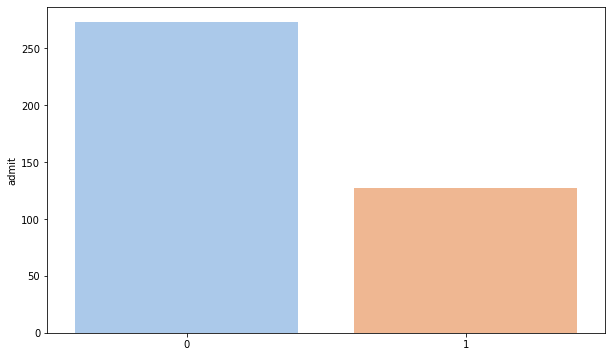

In [ ]:
plt.figure(figsize=(10,6))
labels=[0,1]
sns.barplot(x=labels,y=dataset['admit'].value_counts(),palette='pastel')

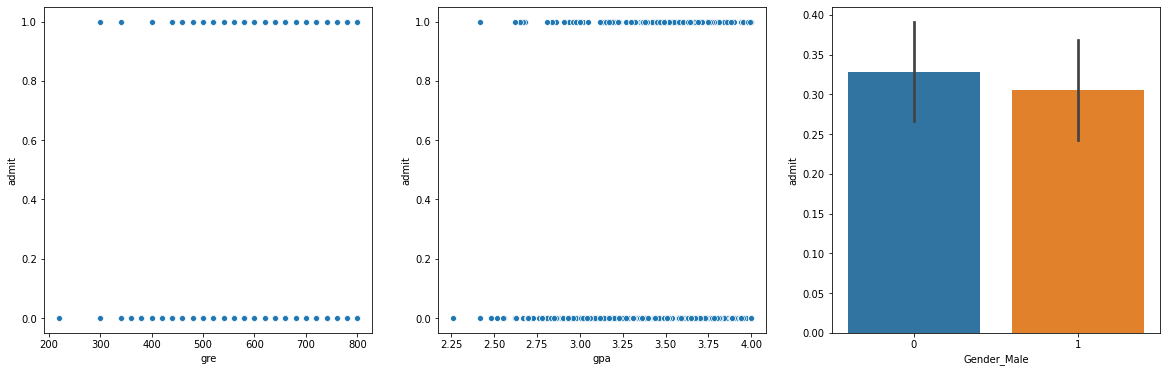

In [ ]:
figs,((ax1,ax2,ax3)) = plt.subplots(1,3,figsize=(20,6))
sns.scatterplot('gre','admit',data=dataset,ax=ax1)
sns.scatterplot('gpa','admit',data=dataset,ax=ax2)
sns.barplot('Gender_Male','admit',data=dataset,ax=ax3)
#sns.barplot('Race','admit',data=dataset,ax=ax4)
#sns.barplot('ses','admit',data=dataset,ax=ax5)
#sns.scatterplot('rank','admit',data=dataset,ax=ax6)

Gender_Male
0    210
1    190
Name: Gender_Male, dtype: int64


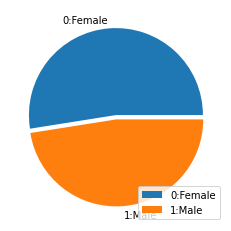

In [ ]:
gender_count = dataset.groupby('Gender_Male')['Gender_Male'].count()
print(gender_count)
labels = ['0:Female','1:Male']
plt.pie(gender_count,explode=[0,0.05],labels=labels)
plt.legend(loc='lower right')

Does gender affect likelihood to admission??

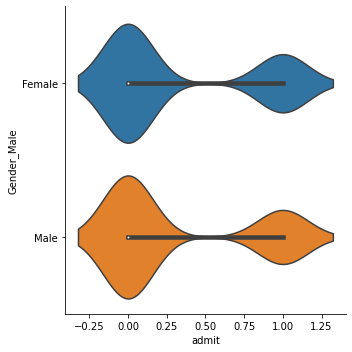

In [ ]:
df1=dataset.copy()
df1['Gender_Male'] = dataset['Gender_Male'].replace([1,0],['Male','Female'])
sns.catplot(x='admit',y='Gender_Male',data=df1,kind='violin')

Does GRE ,& GPA scores influence the chance of getting admitted ?


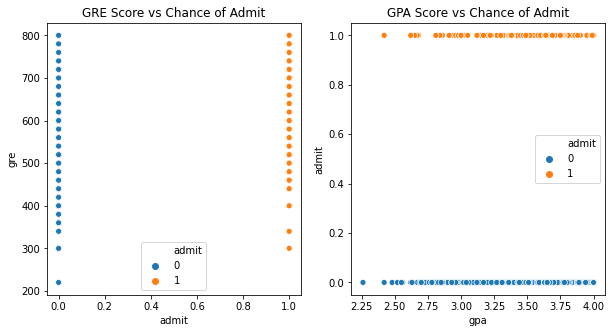

In [ ]:
df= dataset.copy()
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(y=df['gre'] ,x= df['admit']  , hue=df['admit'], ax=ax[0])
sns.scatterplot(df['gpa'] , df['admit'] ,hue=df['admit'] , ax=ax[1])
ax[0].set_title('GRE Score vs Chance of Admit')
ax[1].set_title('GPA Score vs Chance of Admit')
plt.show()

Multivariate Analysis:

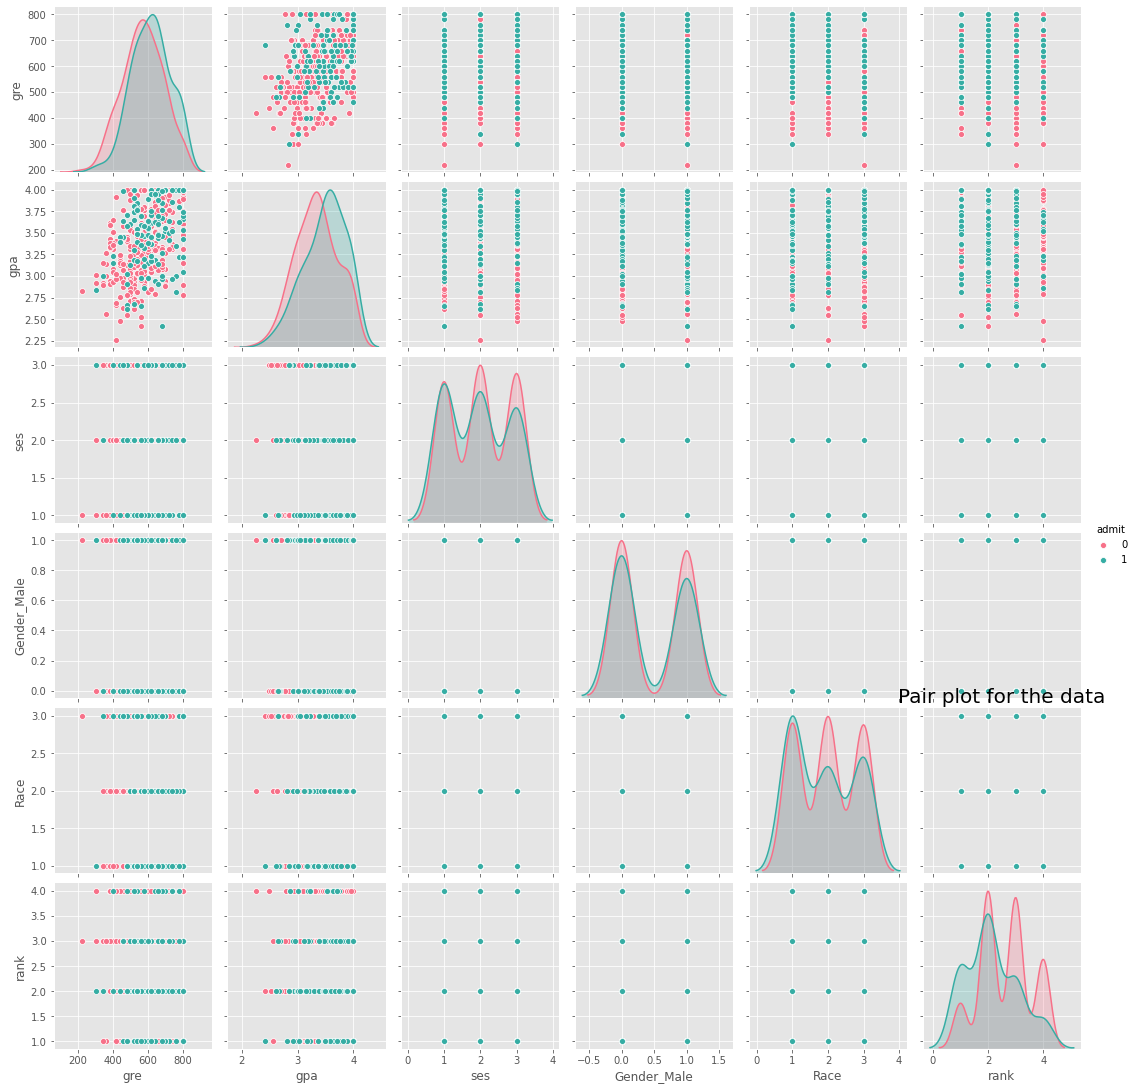

In [ ]:
# plotting a pair plot to see the correlations

plt.rcParams['figure.figsize'] = (20, 21)
plt.style.use('ggplot')

sns.pairplot(dataset, hue = 'admit', palette = 'husl',kind='scatter')
plt.title('Pair plot for the data', fontsize = 20)
plt.show()

## Modeling 

In [39]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
# performance metrics library
from sklearn import metrics


In [12]:
feature_column_names = [ 'gre', 'gpa','Gender_Male']

predicted_class_name = ['admit']

# Getting feature variable values

X = dataset[feature_column_names].values
y = dataset[predicted_class_name].values



In [13]:
#splitting training & testing
# Saving 10% for testing
validation_size = 0.10
#ensuring that split happens in the same place
seed = 9
# Splitting using scikit-learn train_test_split function
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=validation_size, random_state = seed)

#checking if spliting worked in the good way
print("{0:0.2f}% in training set".format((len(X_train)/len(dataset.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(dataset.index)) * 100))



90.00% in training set
10.00% in test set


In [14]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(360, 3)
(40, 3)
(360, 1)
(40, 1)


In [ ]:
#checking if any row has zero value or not
print("# rows in dataset {0}".format(len(dataset)))
print("# rows missing gre: {0}".format(len(dataset.loc[dataset['gre'] == 0])))
print("# rows missing gpa: {0}".format(len(dataset.loc[dataset['gpa'] == 0])))
#the Gender_Male will have 0 as O stands for female, and 1 for male

# rows in dataset 400
# rows missing gre: 0
# rows missing gpa: 0


In [15]:
regression = LogisticRegression().fit(X_train, Y_train)

In [16]:
y_pred = regression.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(regression.score(X_test, Y_test)))


Accuracy of logistic regression classifier on test set: 0.80


Using Gradient Boosting Classifier

In [18]:
#//importing X G boost model libraries

from sklearn.preprocessing import MinMaxScaler   
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [19]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
lr_list = [.001,.01,.9,1]
#// X G boost model :
for learning_rate in np.arange(0.1, 1.1, 0.1):
    gb_clf = GradientBoostingClassifier(learning_rate=learning_rate, max_features='auto', random_state=0)
    gb_clf.fit(X_train, Y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, Y_train)))
    print("Accuracy score (testing): {0:.3f}".format(gb_clf.score(X_test, Y_test)))

Learning rate:  0.1
Accuracy score (training): 0.861
Accuracy score (testing): 0.650
Learning rate:  0.2
Accuracy score (training): 0.922
Accuracy score (testing): 0.625
Learning rate:  0.30000000000000004
Accuracy score (training): 0.944
Accuracy score (testing): 0.675
Learning rate:  0.4
Accuracy score (training): 0.967
Accuracy score (testing): 0.650
Learning rate:  0.5
Accuracy score (training): 0.972
Accuracy score (testing): 0.625
Learning rate:  0.6
Accuracy score (training): 0.981
Accuracy score (testing): 0.575
Learning rate:  0.7000000000000001
Accuracy score (training): 0.986
Accuracy score (testing): 0.625
Learning rate:  0.8
Accuracy score (training): 0.986
Accuracy score (testing): 0.600
Learning rate:  0.9
Accuracy score (training): 0.983
Accuracy score (testing): 0.650
Learning rate:  1.0
Accuracy score (training): 0.986
Accuracy score (testing): 0.625


Here we can see testing accuracy is lesser than the training. It is the issue of overfitting.

XGB Classifier

In [21]:
xg = XGBClassifier()
p =xg.fit(X_train,Y_train)

In [22]:
res_x = xg.predict(X_test)
cm = confusion_matrix(Y_test,res_x)
print(cm)
print(accuracy_score(Y_test,res_x))
print(classification_report(Y_test,res_x))

[[27  4]
 [ 8  1]]
0.7
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        31
           1       0.20      0.11      0.14         9

    accuracy                           0.70        40
   macro avg       0.49      0.49      0.48        40
weighted avg       0.64      0.70      0.67        40



 Implementing Logistic regression with maximum Likelihood

In [23]:
def sigmoid2(X, weight):
    z = np.dot(X, weight)
    return 1 / (1 + np.exp(-z))
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [24]:
def log_likelihood(x, y, weights):
    z = np.dot(x, weights)
    ll = np.sum( y*z - np.log(1 + np.exp(z)) )
    return ll

In [25]:
def gradient_ascent(X, h, y):
    return np.dot(X.T, y - h)

In [26]:
def gradient_descent(X, y, params, learning_rate, iterations):
    m = len(Y_train)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - (learning_rate/m) * (X.T @ (sigmoid(X @ params) - y)) 
        cost_history[i] = compute_cost(X, y, params)

    return (cost_history, params)

In [27]:
def update_weight_mle(weight, learning_rate, gradient):
    return weight + (learning_rate/m) * gradient

In [28]:
num_iter = 600000
n = np.size(X_train,1)
m = len(Y_train)



theta2 = np.zeros((n,1))

for i in range(num_iter):
    h2 = sigmoid2(X_train, theta2)
    gradient2 = gradient_ascent(X_train, h2, Y_train) #np.dot(X.T, (h - y)) / y.size
    theta2 = update_weight_mle(theta2, 0.008, gradient2)

In [29]:
def predict2(X, params):
    return np.round(sigmoid(X @ theta2))

In [30]:
result2 = predict2(X_test, theta2)

In [31]:
score = float(sum(result2 == Y_test))/ float(len(Y_test))

print(score)

0.775


Accuracy using maximum likelihood is 77.5%

Random Forest classifier Model

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [33]:
X_train.shape

(360, 3)

In [34]:
num_trees = 200
max_features = 3
random_forest_model = RandomForestClassifier( #Model fitting
                               n_estimators=num_trees, max_features=max_features)
random_forest_model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
#rf_predict_train= random_forest_model.predict(X_test)  #predicting values of testing dataset

In [41]:
#random_forest_model.score(X_test, Y_test )

rf_predict_train = random_forest_model.predict(X_train)

#get accuracy
rf_accuracy = metrics.accuracy_score(Y_train, rf_predict_train)

#print accuracy
print ("Accuracy: {0:.4f}".format(rf_accuracy))

Accuracy: 0.9861


In [44]:
#predict testing data
rf_predict_test = random_forest_model.predict(X_test)

#get accuracy
rf_accuracy_testdata = metrics.accuracy_score(Y_test, rf_predict_test)

#print accuracy
print ("Accuracy: {0:.4f}".format(rf_accuracy_testdata))

Accuracy: 0.6750


Accuracy using Random Forest tree is is 67.5%





In [45]:
print ("Confusion Matrix for Random Forest")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(Y_test, rf_predict_test, labels=[1, 0])))

print ("")

print ("Classification Report\n")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(Y_test, rf_predict_test, labels=[1, 0])))

Confusion Matrix for Random Forest
[[ 3  6]
 [ 7 24]]

Classification Report

              precision    recall  f1-score   support

           1       0.30      0.33      0.32         9
           0       0.80      0.77      0.79        31

    accuracy                           0.68        40
   macro avg       0.55      0.55      0.55        40
weighted avg       0.69      0.68      0.68        40



Implementing SVM

In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)



In [ ]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy for SVM:",metrics.accuracy_score(Y_test, y_pred))

Accuracy for SVM: 0.775


In [ ]:
# Cross validation code for random forest model
from sklearn.model_selection import train_test_split, cross_val_score

result_cross_val = cross_val_score(random_forest_model, X, y, cv = 10)
random_forest_accuracy = np.mean(result_cross_val)

print("\n\nRandom forest model accuracy after cross validation = ", random_forest_accuracy)



Random forest model accuracy after cross validation =  0.6100000000000001


plotting the feature importance of variables used in the model

[0.34822544 0.63939368 0.01238089]


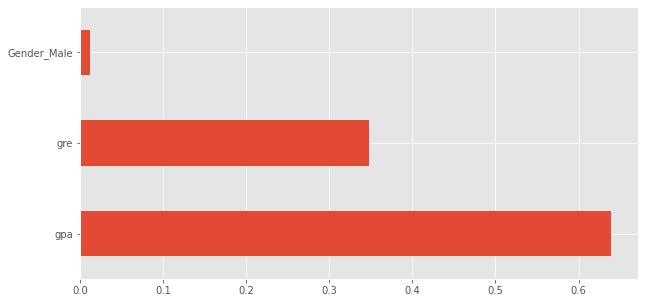

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
plt.figure(figsize=(10,5))
feat_importances = pd.Series(model.feature_importances_, index=feature_column_names)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [4]:
num_trees = 200
max_features = 3
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features,random_state=42)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [84]:
results = []
names = []
scoring = 'accuracy'

#bring out em cross validation
for name, model in models:
	kfold = KFold(n_splits = 10, random_state=42)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring = scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name,cv_results.mean(), cv_results.std())
	print(msg)
 
#print(results)

LR: 0.669444 (0.066260)
LDA: 0.661111 (0.078371)
KNN: 0.633333 (0.084984)
CART: 0.591667 (0.076628)
RF: 0.622222 (0.067128)
NB: 0.661111 (0.067814)
SVM: 0.661111 (0.067814)


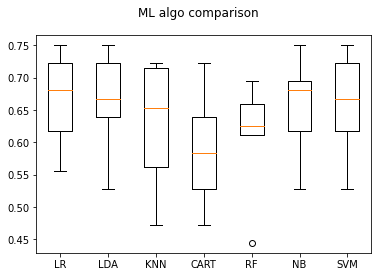

In [80]:
#lets box plot model scores

fig = pyplot.figure()
fig.suptitle('ML algo comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


In [50]:
#create prediction model
model = LogisticRegression()

In [51]:
#fit model
model.fit(X_train, Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
#predict!
predictions = model.predict(X_test)

In [54]:
#check accuracy
print("Model --- LogisticRegression")
print("Accuracy: {} ".format(accuracy_score(Y_test,predictions) * 100))
print(classification_report(Y_test, predictions))

Model --- LogisticRegression
Accuracy: 80.0 
              precision    recall  f1-score   support

           0       0.79      1.00      0.89        31
           1       1.00      0.11      0.20         9

    accuracy                           0.80        40
   macro avg       0.90      0.56      0.54        40
weighted avg       0.84      0.80      0.73        40



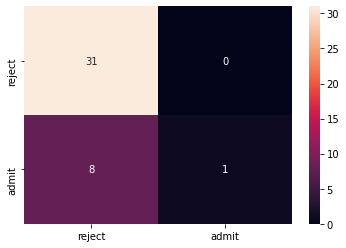

<Figure size 216x216 with 0 Axes>

In [55]:
#plotting confusion matrix on heatmap
cm = confusion_matrix(Y_test, predictions)
sns.heatmap(cm, annot=True, xticklabels=['reject','admit'], yticklabels=['reject','admit'])
plt.figure(figsize=(3,3))
plt.show()

Trying to reduce overfitting by using Regularization Hyperparameter

In [81]:


lr_model = LogisticRegression(C=1, random_state=42,penalty='l2')
lr_model.fit(X_train, Y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print ("Accuracy : {0:.4f}".format(metrics.accuracy_score(Y_test, lr_predict_test)))

print ("Confusion Matrix")

print (metrics.confusion_matrix(Y_test, lr_predict_test, labels=[1, 0]))

print ("")

print ("Classification Report")

print (metrics.classification_report(Y_test, lr_predict_test, labels=[1, 0]))

Accuracy : 0.8000
Confusion Matrix
[[ 1  8]
 [ 0 31]]

Classification Report
              precision    recall  f1-score   support

           1       1.00      0.11      0.20         9
           0       0.79      1.00      0.89        31

    accuracy                           0.80        40
   macro avg       0.90      0.56      0.54        40
weighted avg       0.84      0.80      0.73        40



1st max value of 0.111 occured at C=0.500


Text(0, 0.5, 'recall score')

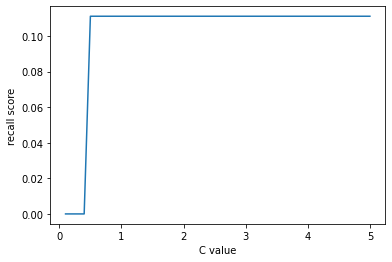

In [82]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start

best_recall_score = 0

while (C_val < C_end):
    C_values.append(C_val)

    lr_model_loop = LogisticRegression(C=C_val,random_state=42,penalty='l2')

    lr_model_loop.fit(X_train, Y_train)

    lr_predict_loop_test = lr_model_loop.predict(X_test)

    recall_score = metrics.recall_score(Y_test, lr_predict_loop_test)

    recall_scores.append(recall_score)

    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test

    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]

print ("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

K-fold validation

In [77]:
from sklearn.linear_model import LogisticRegressionCV

lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False,solver='liblinear')  

# set number of jobs to -1 which uses all cores to parallelize
lr_cv_model.fit(X_train, Y_train)

lr_cv_predict_test = lr_cv_model.predict(X_test)

# training metrics
print ("Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_test, lr_cv_predict_test)))
print (metrics.confusion_matrix(Y_test, lr_cv_predict_test, labels=[1, 0]) )
print ("")
print ("Classification Report")
print (metrics.classification_report(Y_test, lr_cv_predict_test, labels=[1,0]))

Accuracy: 0.8000
[[ 1  8]
 [ 0 31]]

Classification Report
              precision    recall  f1-score   support

           1       1.00      0.11      0.20         9
           0       0.79      1.00      0.89        31

    accuracy                           0.80        40
   macro avg       0.90      0.56      0.54        40
weighted avg       0.84      0.80      0.73        40

